In [165]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd

In [ ]:
df=pd.read_csv(r"D:\T\test_codeEVT\dataset\Majestic.csv")
df=df[['Track ID','TimeStamp','Type','X','Y']].dropna()
df['Track ID'] = df['Track ID'].astype(int)
df=df[df['Track ID']>=1]
df['Track ID'] = df['Track ID'].sort_values()
unique_tracks_per_type = df.groupby('Type')['Track ID'].nunique()
print(unique_tracks_per_type)
print(f'total {sum(unique_tracks_per_type)}')
print(df['TimeStamp'].max())


Type
 Bicycle           1
 Bus              61
 Car            1040
 Light Truck     203
 Motorcycle     3011
 Pedestrian     1069
 Tractor           1
 Tuk-Tuk        1740
 Van               9
Name: Track ID, dtype: int64
total 7135
5529.92


In [ ]:
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
pedRow=df[df['Type']==' Pedestrian']['Track ID'].iloc[0]
df=df[df['Track ID']== ]
df=df.sort_values(by=['Track ID','TimeStamp'])
ip_count=len(ped)

In [168]:
dt=0.16
Dx=np.zeros(len(df))
Dy=np.zeros(len(df))
dx=np.nan
dy=np.nan
i=0
while i<len(df):
    if (i==0):
        pass
    elif(df['Track ID'].iloc[i]!=df['Track ID'].iloc[i-1]):
        dx=np.nan
        dy=np.nan
    else:
        dx=df['X'].iloc[i]-df['X'].iloc[i-1]
        dy=df['Y'].iloc[i]-df['Y'].iloc[i-1]

    Dx[i]=(dx)
    Dy[i]=(dy)
    i+=1

df['dx']=Dx
df['dy']=Dy
df['vx']=df['dx']/dt
df['vy']=df['dy']/dt
df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dummydata2.csv")

total Pedestrian : 1069
total fast ped (max) > 10 m/s : 248


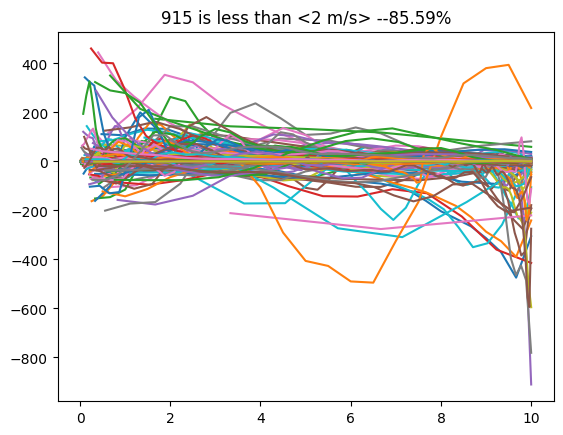

In [ ]:
# df.tail(250)
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dummydata2.csv")
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
counter=0
fp=0
t=2
t2=10
print(f'total Pedestrian : {len(ped)}')
for i in ped:
    y=df[df['Track ID']==i]['vx']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.max()>t2):
        fp+=1

plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')
print(f'total fast ped (max) > {t2} m/s : {fp}')


# Applying Kalman Filter

In [ ]:
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dummydata2.csv")
dd=pd.DataFrame(columns=[
    'Track ID', 'TimeStamp', 'Type', 'X', 'Y', 'dx', 'dy', 'vx', 'vy',
    'dvx', 'dvy', 'ax', 'ay', 'vx_smooth', 'dx_smooth', 'x_smooth',
    'vy_smooth', 'dy_smooth', 'y_smooth'
])
for m in ped:
    set=df[df['Track ID']==m]

    nom=len(set)
    sensor=set['vx']
    r=0.005#flatness
    c=.01
    x=np.zeros(nom)
    p=np.zeros(nom)
    x_minus=np.zeros(nom)
    p_minus=np.zeros(nom)
    k_gain=np.zeros(nom)
    x[0]=set['vx'].iloc[1]
    p[0]=1
    for i in range(1,nom):
        x_minus[i]=x[i-1]
        p_minus[i]=p[i-1]+c
        k_gain[i]=p_minus[i]/(p_minus[i]+r)
        x[i]=x_minus[i]+k_gain[i]*(sensor.iloc[i]-x_minus[i])
        p[i]=(1-k_gain[i])*p_minus[i]

    set['vx_smooth']=x
    set['dx_smooth']=dt*set['vx_smooth']
    set['x_smooth']=0
    for i in range(len(set)):
        if i==0:
            set['x_smooth'].iloc[i]=set['X'].iloc[i]


        else:
            set['x_smooth'].iloc[i]=set['x_smooth'].iloc[i-1]+set['dx_smooth'].iloc[i]
    dd = pd.concat([dd, set], ignore_index=True)



C:\Users\Tusha\AppData\Local\Temp\ipykernel_28648\347772736.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set['vx_smooth']=x
C:\Users\Tusha\AppData\Local\Temp\ipykernel_28648\347772736.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set['dx_smooth']=dt*set['vx_smooth']
C:\Users\Tusha\AppData\Local\Temp\ipykernel_28648\347772736.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [196]:
dd.count()
dd.to_csv((r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dd.csv"))

total Pedestrian : 1069
total fast ped (max) > 10 m/s : 194


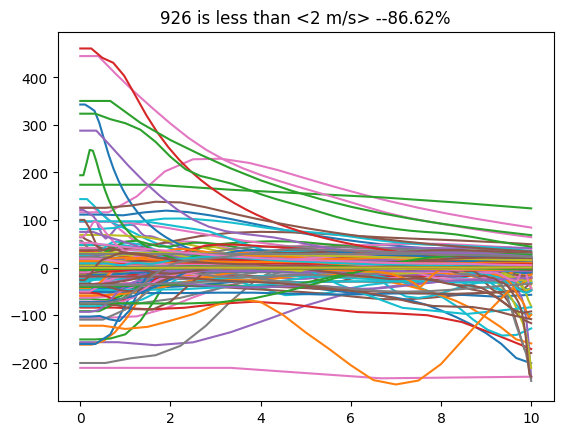

In [225]:
df=pd.read_csv((r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dd.csv"))
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
counter=0
fp=0
t=2
t2=10
print(f'total Pedestrian : {len(ped)}')
for i in ped:
    y=df[df['Track ID']==i]['vx_smooth']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.abs().max()>t2):
        fp+=1

plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')
print(f'total fast ped (max) > {t2} m/s : {fp}')
df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/K_filtered.csv")


In [ ]:
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/K_filtered.csv")

min_abs_vx = df.groupby('Track ID')['vx_smooth'].apply(lambda x: x.abs().min())

qualified = min_abs_vx[min_abs_vx > t2]

count = len(qualified)
print(df.columns)
print("Count of pedestrians with min(|vx_smooth|) > t2:", count)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Track ID', 'TimeStamp', 'Type', 'X',
       'Y', 'dx', 'dy', 'vx', 'vy', 'dvx', 'dvy', 'ax', 'ay', 'vx_smooth',
       'dx_smooth', 'x_smooth', 'vy_smooth', 'dy_smooth', 'y_smooth',
       'Unnamed: 0'],
      dtype='object')
Count of pedestrians with min(|vx_smooth|) > t2: 40


total Pedestrian : 1029
total fast ped (max) > 10 m/s : 154
fast peds = 154


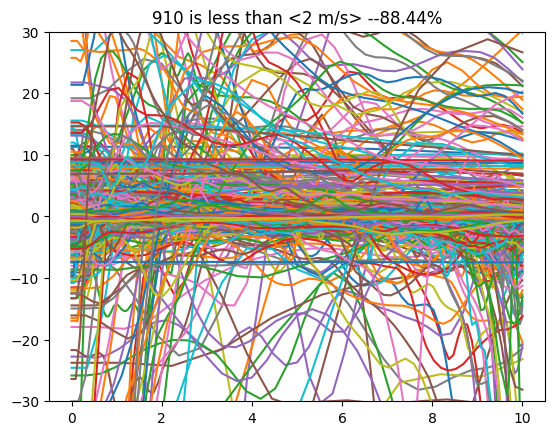

In [316]:
qualified_ids = min_abs_vx[min_abs_vx > t2].index.tolist()
df= df[~df['Track ID'].isin(qualified_ids)]
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
len(ped)
counter=0
fp=0
fp_ID=[]
print(f'total Pedestrian : {len(ped)}')
for i in ped:
    y=df[df['Track ID']==i]['vx_smooth']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.abs().max()>t2):
        fp+=1
        fp_ID.append(i)


plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')
plt.ylim(-30,30)
print(f'total fast ped (max) > {t2} m/s : {fp}')
print(f'fast peds = {len(fp_ID)}')


total Pedestrian : 875
total fast ped (max) > 10 m/s : 0


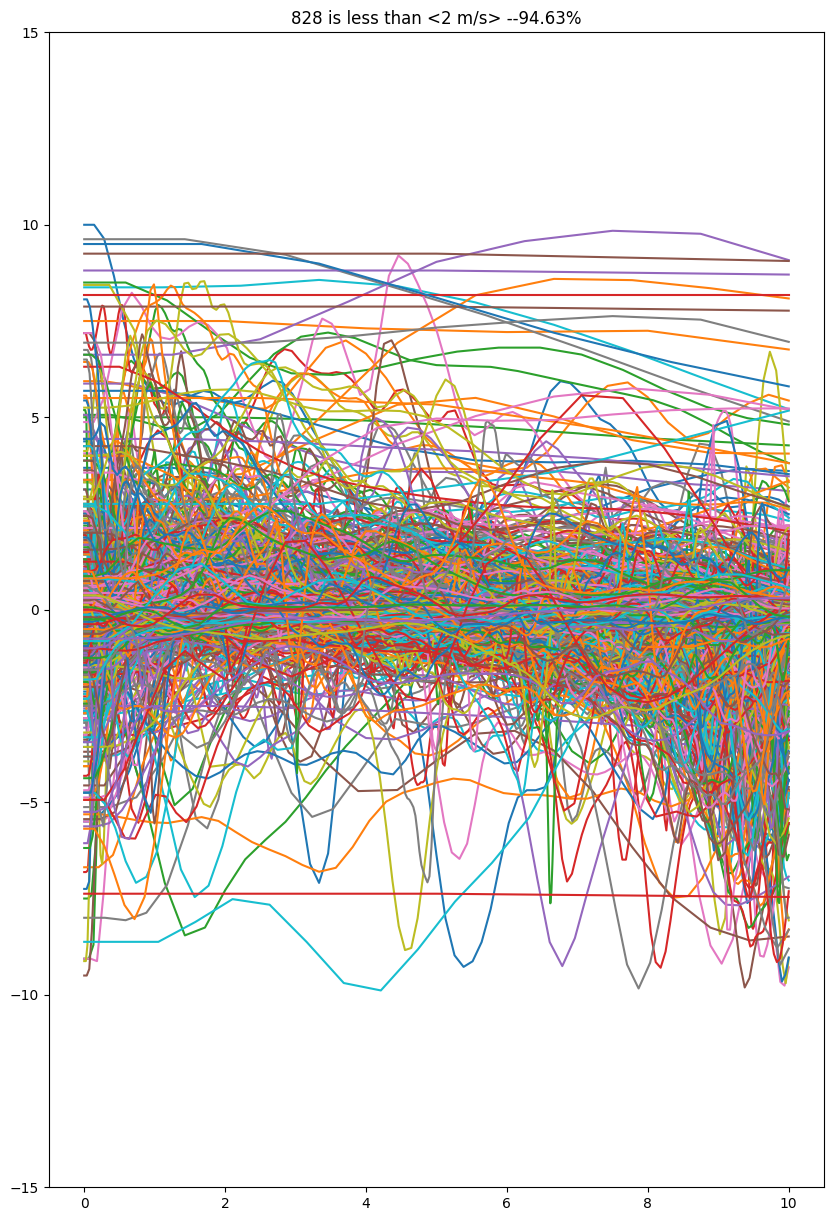

In [ ]:
df= df[~df['Track ID'].isin(fp_ID)]
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
ndc=df[df['Type']==' Pedestrian']['Track ID'].count()
len(ped)
counter=0
fp=0
fp_ID=[]
print(f'total Pedestrian : {len(ped)}')
plt.figure(figsize=(10,15))
for i in ped:
    y=df[df['Track ID']==i]['vx_smooth']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.abs().max() > t2):
        fp+=1
        fp_ID.append(i)


plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')

plt.ylim(-15,15)
print(f'total fast ped (max) > {t2} m/s : {fp}')

In [318]:
print(f'percentage retention of Ped  : {round(len(ped)*100/ip_count,2)}')
print(f'percentage retention of data  : {round(ndc*100/pedRow,2)}')

percentage retention of Ped  : 81.85
percentage retention of data  : 90.88


total rows = 163758
Rows with |vx_smooth| > t2 = 2814
total Pedestrian : 1029
total fast ped (max) > 10 m/s : 0


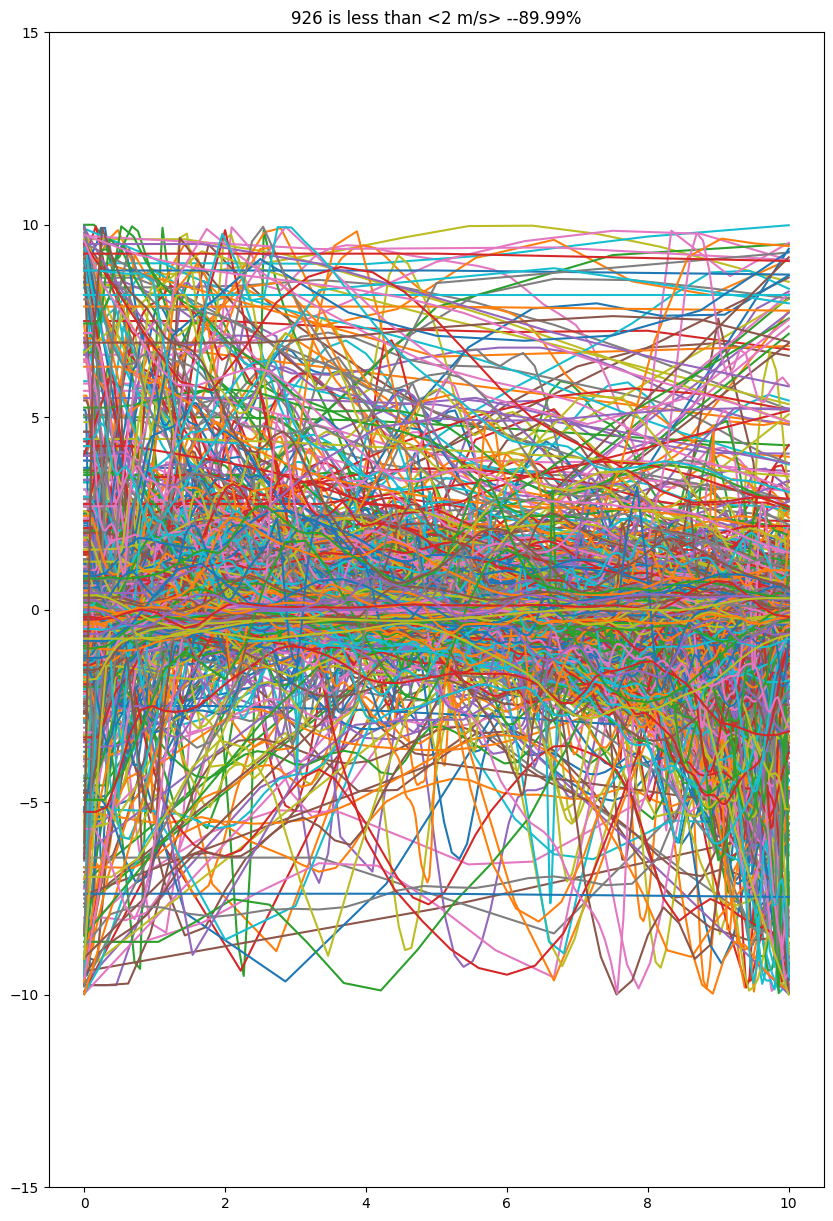

In [350]:
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/K_filtered.csv")
qualified_ids = min_abs_vx[min_abs_vx > t2].index.tolist()
df= df[~df['Track ID'].isin(qualified_ids)]
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
len(ped)
tr=(df['Track ID'].count())
print (f"total rows = {tr}")
rows_to_delete = df[df['vx_smooth'].abs() > t2]
print(f"Rows with |vx_smooth| > t2 = {len(rows_to_delete)}")
df = df[df['vx_smooth'].abs() <= t2]
ndc=df[df['Type']==' Pedestrian']['Track ID'].count()


counter=0
fp=0
fp_ID=[]
print(f'total Pedestrian : {len(ped)}')
plt.figure(figsize=(10,15))
for i in ped:
    y=df[df['Track ID']==i]['vx_smooth']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.abs().max() > t2):
        fp+=1
        fp_ID.append(i)


plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')

plt.ylim(-15,15)
print(f'total fast ped (max) > {t2} m/s : {fp}')


In [351]:
print(f'percentage retention of Ped  : {round(len(ped)*100/ip_count,2)}')
print(f'percentage retention of data  : {round(ndc*100/pedRow,2)}')

percentage retention of Ped  : 96.26
percentage retention of data  : 97.89


# Kalman on Vy

In [323]:
df=pd.read_csv((r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dd.csv"))
dd=pd.DataFrame(columns=[
    'Track ID', 'TimeStamp', 'Type', 'X', 'Y', 'dx', 'dy', 'vx', 'vy',
    'dvx', 'dvy', 'ax', 'ay', 'vx_smooth', 'dx_smooth', 'x_smooth',
    'vy_smooth', 'dy_smooth', 'y_smooth'
])
for m in ped:
    track_df = df[df['Track ID'] == m]
    nom = len(track_df)
    sensor = track_df['vy']

    x = np.zeros(nom)
    p = np.zeros(nom)
    x_minus = np.zeros(nom)
    p_minus = np.zeros(nom)
    k_gain = np.zeros(nom)

    x[0] = sensor.iloc[1]  
    p[0] = 1

    for i in range(1, nom):
        x_minus[i] = x[i - 1]
        p_minus[i] = p[i - 1] + c
        k_gain[i] = p_minus[i] / (p_minus[i] + r)
        x[i] = x_minus[i] + k_gain[i] * (sensor.iloc[i] - x_minus[i])
        p[i] = (1 - k_gain[i]) * p_minus[i]

    track_df['vy_smooth'] = x
    track_df['dy_smooth'] = dt * track_df['vy_smooth']
    track_df['y_smooth'] = 0

    for i in range(nom):
        if i == 0:
            track_df.loc[track_df.index[i], 'y_smooth'] = track_df['Y'].iloc[i]
        else:
            track_df.loc[track_df.index[i], 'y_smooth'] = track_df['y_smooth'].iloc[i - 1] + track_df['dy_smooth'].iloc[i]

    df.loc[track_df.index, ['vy_smooth', 'dy_smooth', 'y_smooth']] = track_df[['vy_smooth', 'dy_smooth', 'y_smooth']]



C:\Users\Tusha\AppData\Local\Temp\ipykernel_28648\4143297367.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_df['vy_smooth'] = x
C:\Users\Tusha\AppData\Local\Temp\ipykernel_28648\4143297367.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_df['dy_smooth'] = dt * track_df['vy_smooth']
C:\Users\Tusha\AppData\Local\Temp\ipykernel_28648\4143297367.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

total Pedestrian : 1069
total fast ped (max) > 10 m/s : 194


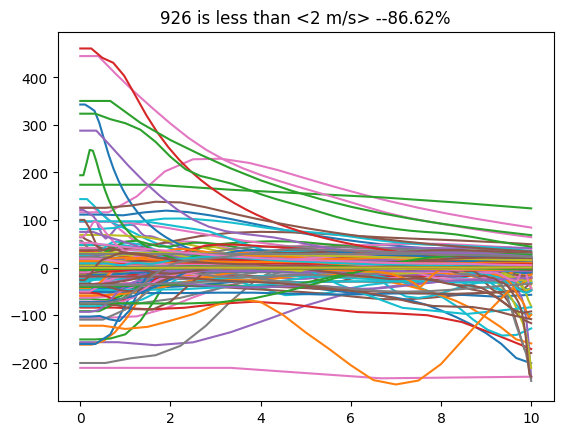

total fast ped (max) > 10 m/s : 147


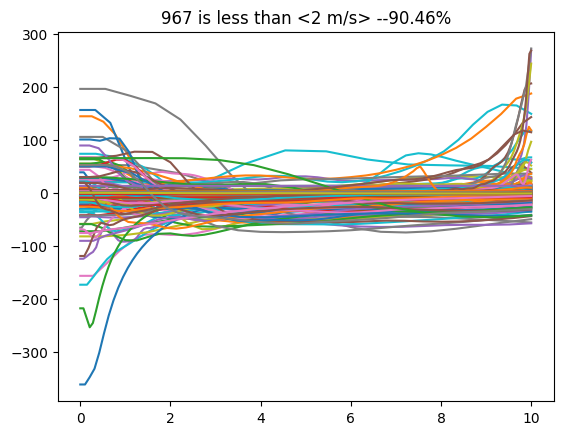

In [329]:
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
counter=0
fp=0
t=2
t2=10
print(f'total Pedestrian : {len(ped)}')
for i in ped:
    y=df[df['Track ID']==i]['vx_smooth']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.abs().max()>t2):
        fp+=1

plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')
print(f'total fast ped (max) > {t2} m/s : {fp}')
plt.show()
counter=0
fp=0

for i in ped:
    y=df[df['Track ID']==i]['vy_smooth']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.abs().max()>t2):
        fp+=1

plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')
print(f'total fast ped (max) > {t2} m/s : {fp}')

plt.show()
df.to_csv((r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/K_filtered2.csv"))

Count of pedestrians with min(|vx_smooth|) > t2: 40
Count of pedestrians with min(|vy_smooth|) > t2: 23
total Pedestrian : 1006
total rows = 163308
Rows with |vx_smooth| > t2 = 2478
Rows with |vy_smooth| > t2 = 2941
total Pedestrian : 1006
total fast ped (max) > 10 m/s : 0


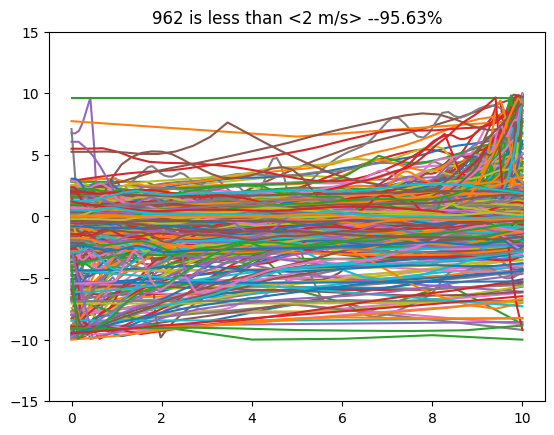

In [ ]:
df= pd.read_csv((r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/K_filtered2.csv"))
min_abs_vx = df.groupby('Track ID')['vx_smooth'].apply(lambda x: x.abs().min())
qualified = min_abs_vx[min_abs_vx > t2]
count = len(qualified)
print("Count of pedestrians with min(|vx_smooth|) > t2:", count)
qualified_ids = min_abs_vx[min_abs_vx > t2].index.tolist()
df= df[~df['Track ID'].isin(qualified_ids)]                      ###########
min_abs_vy = df.groupby('Track ID')['vy_smooth'].apply(lambda x: x.abs().min())
qualified = min_abs_vy[min_abs_vy > t2]
count = len(qualified)
print("Count of pedestrians with min(|vy_smooth|) > t2:", count)
qualified_ids = min_abs_vy[min_abs_vy > t2].index.tolist()
df= df[~df['Track ID'].isin(qualified_ids)]                      ############
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
len(ped)
counter=0
fp=0
fp_ID=[]
print(f'total Pedestrian : {len(ped)}')
tr=(df['Track ID'].count())
print (f"total rows = {tr}")
rows_to_delete = df[df['vx_smooth'].abs() > t2]
print(f"Rows with |vx_smooth| > t2 = {len(rows_to_delete)}")
rows_to_delete = df[df['vy_smooth'].abs() > t2]
print(f"Rows with |vy_smooth| > t2 = {len(rows_to_delete)}")
df = df[df['vx_smooth'].abs() <= t2]                            ##########
df = df[df['vy_smooth'].abs() <= t2]
print(f'total Pedestrian : {len(ped)}')
ndc=df[df['Type']==' Pedestrian']['Track ID'].count()
for i in ped:
    y=df[df['Track ID']==i]['vy_smooth']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.abs().max()>t2):
        fp+=1

plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')
plt.ylim(-15,15)

print(f'total fast ped (max) > {t2} m/s : {fp}')

plt.show()

In [349]:
print(f'percentage retention of Ped  : {round(len(ped)*100/ip_count,2)}')
print(f'percentage retention of data  : {round(ndc*100/pedRow,2)}')

percentage retention of Ped  : 94.11
percentage retention of data  : 97.29


# no kf

In [359]:
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dummydata2.csv")
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
before= df['Track ID'].count()

In [ ]:
df = df[df['vx'].abs() <= t2]
df = df[df['vy'].abs() <= t2]
ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
print(f'total Pedestrian : {len(ped)}')
after= df['Track ID'].count()
print(after*100/before)

total Pedestrian : 1037
96.29109266186175


total Pedestrian : 1037
total fast ped (max) > 10 m/s : 0


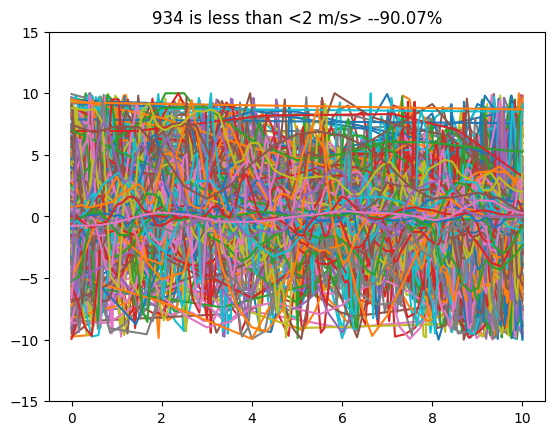

In [366]:
counter=0
fp=0
t=2
t2=10
print(f'total Pedestrian : {len(ped)}')
for i in ped:
    y=df[df['Track ID']==i]['vx']
    x=np.linspace(0,10,len(y))
    plt.plot(x,y)
    if(y.mean()<t):
        counter+=1
    if (y.max()>t2):
        fp+=1

plt.ylim(-15,15)
plt.title(f'{counter} is less than <{t} m/s> --{round(counter*100/len(ped),2)}%')
print(f'total fast ped (max) > {t2} m/s : {fp}')